**IMPORTS**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

%load_ext autoreload
%autoreload 

**DATASET**

In [4]:
X = np.random.randint(2, size = (2, 400)) # creo una matrice con due numeri (0,1), su 2 colonne e 5 linee
Y = np.logical_xor(X[0],X[1]) # creo delle coppie tra le due linee della matrice X (restituisci True se "or" is True)
Y = Y.reshape(1,X.shape[1])*1 # forziamo la macchina a capire che per l'output voglio una linea e 5 colonne. Moltiplico per 1 per trsaformare True et False en 0 et 1

#print(X)
print(f"X.shape = {X.shape}")
# print(Y)
print(f"Y.shape = {Y.shape}")

X.shape = (2, 400)
Y.shape = (1, 400)


**STRUCTURE DU RESEAUX**

In [5]:
n_x = int(X.shape[0])   # n° of inputs units
print(f'Input layer = {n_x} units (n_x)')
        
n_h = 3 # n° of neurones dans l'hidden layer
print(f'Hidden layer = {n_h} units (n_h)')

#int(input('How many units in the hidden layer ? '))

n_y = int(Y.shape[0])   # n° of output units
print(f'Output layer = {n_y} output (n_y)')

nn_structure = {'n_x':n_x,'n_h':n_h,'n_y':n_y}
print()
print(f'NN structure = {nn_structure}')

Input layer = 2 units (n_x)
Hidden layer = 3 units (n_h)
Output layer = 1 output (n_y)

NN structure = {'n_x': 2, 'n_h': 3, 'n_y': 1}


**INITIALISATION PARAMETRES**

In [12]:
def init_param(n_x,n_h,n_y):
    
    '''
    Function qui inizialize mes parametres
    
    Weight initialisés random, Bias initialisés à zero
    
    '''
    np.random.seed(0)
    
    w1 = np.random.randn(n_h,n_x) / np.sqrt(n_x)
    b1 = np.zeros((n_h,1))
    w2 = np.random.randn(n_y,n_h) / np.sqrt(n_h)
    b2 = np.zeros((n_y,1))
    
    parametres = {'w1': w1, 
                  'b1':b1, 
                  'w2':w2, 
                  'b2':b2}
    
    print(f"w1 : {w1.shape}")
    print(f"b1 : {b1.shape}")
    print(f"w2 : {w2.shape}")
    print(f"b2 : {b2.shape}")

    
    return parametres

In [7]:
parametres = init_param(n_x,n_h,n_y)

w1 : (3, 2)
b1 : (3, 1)
w2 : (1, 3)
b2 : (1, 1)


In [8]:
parametres

{'w1': array([[ 1.24737338,  0.28295388],
        [ 0.69207227,  1.58455078],
        [ 1.32056292, -0.69103982]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'w2': array([[ 0.5485338 , -0.08738612, -0.05959343]]), 'b2': array([[0.]])}

**FORWARD PROPAGATION**

In [13]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    return s

In [14]:
def forward(X,parametres):
    
    w1 = parametres['w1']
    b1 = parametres['b1']
    w2 = parametres['w2']
    b2 = parametres['b2']
    
    z1 = np.dot(w1,X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    
    cache = {'z1': z1,
             'a1': a1,
             'z2': z2,
             'a2': a2}
    
    #print(f"a1 : {a1.shape}")
    #print(f"a2 : {a2.shape}")
    
    return cache, a2

In [11]:
forward(X,parametres)

({'z1': array([[ 1.24737338,  0.28295388,  1.24737338, ...,  1.53032725,
           0.28295388,  0.28295388],
         [ 0.69207227,  1.58455078,  0.69207227, ...,  2.27662304,
           1.58455078,  1.58455078],
         [ 1.32056292, -0.69103982,  1.32056292, ...,  0.6295231 ,
          -0.69103982, -0.69103982]]),
  'a1': array([[0.77684485, 0.57027026, 0.77684485, ..., 0.82205419, 0.57027026,
          0.57027026],
         [0.66642775, 0.82984805, 0.66642775, ..., 0.90692238, 0.82984805,
          0.82984805],
         [0.78927535, 0.3338018 , 0.78927535, ..., 0.65238132, 0.3338018 ,
          0.3338018 ]]),
  'z2': array([[0.32085349, 0.22040291, 0.32085349, 0.33279444, 0.22040291,
          0.32085349, 0.22040291, 0.33279444, 0.33279444, 0.32085349,
          0.22040291, 0.22040291, 0.22040291, 0.32085349, 0.32085349,
          0.20077712, 0.22040291, 0.32085349, 0.32085349, 0.22040291,
          0.33279444, 0.33279444, 0.32085349, 0.32085349, 0.22040291,
          0.20077712, 

In [12]:
cache, a2 = forward(X,parametres)

In [15]:
def cost_funct(AL, Y):
    m = Y.shape[1]
    logprob = (Y * np.log(AL) + (1-Y) * np.log(1-AL))
    #ensuite la cost
    cost = -(np.sum(logprob))/m
    #je veux que l'on me retourne un nombre et non pas un array
    cost = np.squeeze(cost)
    #être sur que j'ai la cost au bon format
    assert(isinstance(cost,float))

    return cost

def cost_funct(A, Y):
    m = Y.shape[1]
    J = - np.sum(np.multiply(np.log(A),Y) + (1 - Y) * np.log(1 - A)) * (1/m)
    J = np.squeeze(J)
    assert(J.shape == ())

    return J

In [14]:
cost_funct(a2,Y)

0.7040052266280814

**BACKWARD PROPAGATION**

In [16]:
def backward(X, Y, cache, parametres, l_r):
    
    a2 = cache['a2']
    a1 = cache['a1']
    w2 = parametres['w2']
    w1 = parametres['w1']
    b1 = parametres['b1']
    b2 = parametres['b2']
    
    m = X.shape[1]
    
    dz2 = a2 - Y
    #print(f'dZ2.shape = {dZ2.shape}')
    dw2 = 1/m * np.dot(dz2, a1.T)
    #print(f'dw2.shape = {dw2.shape}')
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    #print(f'db2.shape = {db2.shape}'
    
    dz1 = (np.dot(w2.T, dz2)) * (1 - (a1**2)) 
    #print(f'dz1.shape = {dz1.shape}')
    dw1 = 1/m * np.dot(dz1, X.T)
    #print(f'dw1.shape = {dw1.shape}')
    #print(dw1.dtype)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    #print(f'db1.shape = {db1.shape}')
    
    w1 = parametres['w1'] - l_r * dw1
    b1 = parametres['b1'] - l_r * db1
    w2 = parametres['w2'] - l_r * dw2
    b2 = parametres['b2'] - l_r * db2
    
    parametres['w1'] = w1
    parametres['b1'] = b1
    parametres['w2'] = w2
    parametres['b2'] = b2

    #print('updated W1 = %s'%params['W1'])
    
    return parametres

In [1]:
def accuracy(Predictions, Labels):
    """
    Predictions shape (1, m)
    Labels shape (1, m)
    """
    
    n_correct = np.sum(Predictions == Labels)
    n_total   = Predictions.shape[1]
    
    accuracy = n_correct / n_total
    
    return accuracy

accuracy(Y, Y)

NameError: name 'Y' is not defined

In [27]:
def nn_model(X,Y,n_x,n_h,n_y, print_freq=100):
    
    # Initialisation
    parametres = init_param(n_x,n_h,n_y)
    
    # Iterations and Learning rate
    num_iter = int(input('\nHow many iterations ? '))
    l_r = float(input('\nLearning rate ? '))
    
    #Loops
    for i in range(0, num_iter):
        # Forward ==> Prediciton a2
        cache, a2 = forward(X, parametres)
        # Cost function
        cost = cost_funct(a2, Y)
        # Backward ==> Update parameters
        parametres = backward(X, Y, cache, parametres, l_r)
        
        if i % print_freq == 0 :
                print(f'\nCost after iteration {i} : {cost}')
            
    predictions = (a2 > 0.5) * 1.
    print(f"\nTrain accuracy: ", accuracy(predictions, Y))
        
    return parametres

In [22]:
parametres = nn_model(X,Y)

w1 : (3, 2)
b1 : (3, 1)
w2 : (1, 3)
b2 : (1, 1)

How many iterations ? 1000

Learning rate ? 1

Cost after iteration 0 : 0.7040052266280814

Cost after iteration 100 : 0.5618047297713764

Cost after iteration 200 : 0.30666198820871604

Cost after iteration 300 : 0.21596661068659032

Cost after iteration 400 : 0.16402332749705612

Cost after iteration 500 : 0.13119522121493823

Cost after iteration 600 : 0.10872190220615645

Cost after iteration 700 : 0.09249689659786937

Cost after iteration 800 : 0.08031558281983545

Cost after iteration 900 : 0.07087598117880674

Train accuracy:  1.0


In [44]:
def predict(X, parametres):
    
    m = X.shape[1]
    
    w1 = parametres['w1']
    b1 = parametres['b1']
    w2 = parametres['w2']
    b2 = parametres['b2']
    
    a1 = sigmoid(np.dot(w1, X)+b1)
    a2 = sigmoid(np.dot(w2, a1)+b2)
    
    Y_pred = (a2 > 0.5)*1
    
    assert Y_pred.shape == (1, m)
    
    return Y_pred

In [24]:
Y_pred = predict(X,parametres)

In [25]:
accuracy(Y_pred, Y)

1.0

In [4]:
def plot_dataset(x, y):
    
    """ Permet d'afficher les classes `y` d'exemples à 2 features `X`
    Warning: La dimension des exemples doit être la première.
    
    Soit m, le nombre d'exemples.
    
    X, matrices d'exemples, deux features par exemple; shape=(2, m))
    y, matrices de labels, shape=(1, m)
    
    return: None
    """
    

    print(x.shape)
    print(y.shape)
    
    plt.scatter(x[0,:], x[1,:], c=y[0,:], cmap=plt.cm.jet) 
    
    return None

(2, 400)
(1, 400)


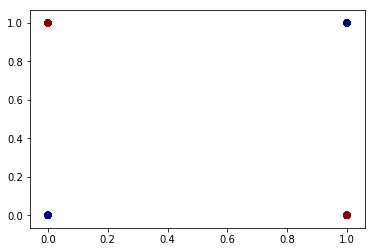

In [27]:
plot_dataset(X,Y)

(2, 400)
(1, 400)


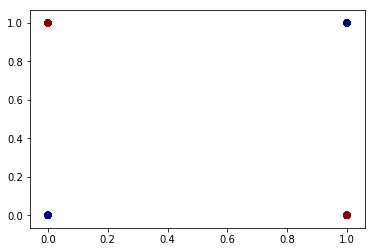

In [28]:
plot_dataset(X,Y_pred)

# Real XOR



(2, 300)
(1, 300)


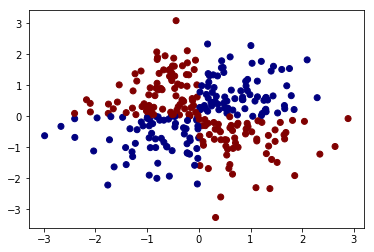

In [5]:
# Je créé un dataset de XOR

n_examples = 300
X = np.random.randn(2, 300)

mask1 = X[0, :] > 0
mask2 = X[1, :] > 0

Y = np.logical_xor(mask1, mask2) * 1.
Y = Y.reshape(1,-1)
plot_dataset(X,Y)

In [6]:
# Split train /test 

split_pct = 0.66

n_train = int(n_examples * split_pct)
n_test  = n_examples - n_train 

X_train = X[:, :n_train]
Y_train = Y[:, :n_train]

X_test = X[:, n_train:]
Y_test = Y[:, n_train:]


print(X_train.shape, X_test.shape)

(2, 198) (2, 102)


(2, 198)
(1, 198)


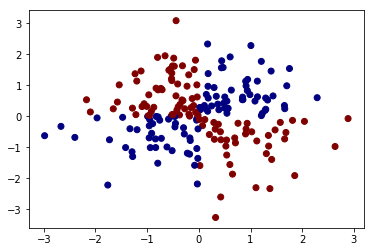

In [7]:
plot_dataset(X_train, Y_train)

(2, 102)
(1, 102)


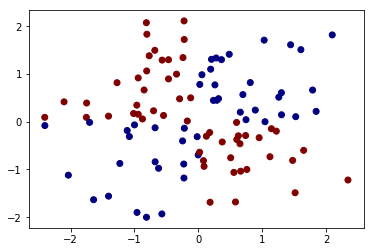

In [8]:
plot_dataset(X_test, Y_test)

### Créer un réseau et l'entrainer sur le trainset

w1 : (35, 2)
b1 : (35, 1)
w2 : (1, 35)
b2 : (1, 1)

How many iterations ? 5000

Learning rate ? 0.05

Cost after iteration 0 : 0.7300821138327638

Cost after iteration 100 : 0.6939092738107574

Cost after iteration 200 : 0.6933010028045615

Cost after iteration 300 : 0.6927464055606555

Cost after iteration 400 : 0.6922082575089723

Cost after iteration 500 : 0.6916684390857993

Cost after iteration 600 : 0.6911068779131728

Cost after iteration 700 : 0.6904998657681117

Cost after iteration 800 : 0.6898205215289746

Cost after iteration 900 : 0.6890391427636978

Cost after iteration 1000 : 0.6881230757737481

Cost after iteration 1100 : 0.6870361280317727

Cost after iteration 1200 : 0.6857377909742578

Cost after iteration 1300 : 0.6841826852070283

Cost after iteration 1400 : 0.6823206222583879

Cost after iteration 1500 : 0.6800975315277927

Cost after iteration 1600 : 0.6774573387221867

Cost after iteration 1700 : 0.6743447874094214

Cost after iteration 1800 : 0.6707091572624638

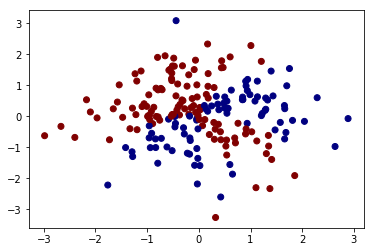

In [68]:
parametres = nn_model(X_train,Y_train,
                        n_x=X_train.shape[0],
                        n_h=35,
                        n_y=Y_train.shape[0],
                        print_freq=100)

Y_train_pred = predict(X_train, parametres)
plot_dataset(X_train, Y_train_pred)

0.7549019607843137
(2, 102)
(1, 102)


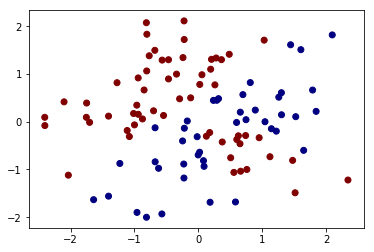

In [69]:
Y_test_pred = predict(X_test, parametres)

print(accuracy(Y_test_pred, Y_test))

plot_dataset(X_test, Y_test_pred)